<a href="https://colab.research.google.com/github/cacbondioxit/Clustering-Goalkeeper/blob/main/ML_Project_code_withGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
data1 = pd.read_excel("/content/drive/MyDrive/2022-Summer-ML-Project/football_clustering_dataset/table_goalkeeping.xlsx")

data2 = pd.read_excel("/content/drive/MyDrive/2022-Summer-ML-Project/football_clustering_dataset/table_advanced_goalkeeping.xlsx")

In [37]:
# 결측치 제거

data1.dropna(inplace=True)
data2.dropna(inplace=True)

In [38]:
df1 = data1.merge(data2, on='Player', how='inner')

df1

,Rk_x,Player,Nation_x,Pos_x,Squad_x,Age_x,Born_x,MP,Starts,Min,...,P assesAvgLen,Goal Kicks Att,Goal Kicks Launch%,Goal Kicks AvgLen,Crosses Opp,Crosses Stp,Crosses Stp%,Sweeper #OPA,Sweeper #OPA/90,Sweeper AvgDist
0,4.0,Daniel Bachmann,at AUT,GK,Watford,27.0,1994.0,12.0,12.0,1080.0,...,47.4,87.0,71.3,52.7,108.0,3.0,2.8,8.0,0.67,13.1
1,5.0,Asmir Begović,ba BIH,GK,Everton,34.0,1987.0,3.0,3.0,270.0,...,54.2,31.0,83.9,58.1,23.0,3.0,13.0,0.0,0.00,12.9
2,6.0,Jack Butland,eng ENG,GK,Crystal Palace,28.0,1993.0,9.0,8.0,765.0,...,31.9,66.0,53.0,43.7,83.0,5.0,6.0,6.0,0.71,13.6
3,8.0,Karl Darlow,eng ENG,GK,Newcastle Utd,30.0,1990.0,8.0,8.0,720.0,...,49.8,64.0,78.1,59.8,69.0,8.0,11.6,4.0,0.50,14.9
4,9.0,Martin Dúbravka,sk SVK,GK,Newcastle Utd,32.0,1989.0,26.0,26.0,2340.0,...,41.1,237.0,92.8,64.8,211.0,17.0,8.1,9.0,0.35,12.7
5,10.0,Ederson,br BRA,GK,Manchester City,27.0,1993.0,37.0,37.0,3330.0,...,30.0,138.0,24.6,31.6,181.0,16.0,8.8,34.0,0.92,17.2
6,11.0,Łukasz Fabiański,pl POL,GK,West Ham,36.0,1985.0,37.0,37.0,3330.0,...,44.1,280.0,70.4,52.9,344.0,14.0,4.1,9.0,0.24,11.8
7,12.0,Álvaro Fernández,es ESP,GK,Brentford,23.0,1998.0,12.0,12.0,1080.0,...,38.6,83.0,56.6,41.0,123.0,7.0,5.7,10.0,0.83,14.3
8,13.0,Fraser Forster,eng ENG,GK,Southampton,33.0,1988.0,19.0,19.0,1710.0,...,44.8,141.0,76.6,54.3,176.0,18.0,10.2,14.0,0.74,13.8
9,14.0,Ben Foster,eng ENG,GK,Watford,38.0,1983.0,26.0,26.0,2340.0,...,51.4,225.0,92.0,65.2,265.0,16.0,6.0,24.0,0.92,15.1


In [39]:
df1.columns

Index(['Rk_x', 'Player', 'Nation_x', 'Pos_x', 'Squad_x', 'Age_x', 'Born_x',
       'MP', 'Starts', 'Min', '90s_x', 'GA_x', 'GA90', 'SoTA', 'Saves',
       'Save%', 'W', 'D', 'L', 'CS', 'CS%', 'PKatt', 'PKA_x', 'PKsv', 'PKm',
       'Save%.1', 'Rk_y', 'Nation_y', 'Pos_y', 'Squad_y', 'Age_y', 'Born_y',
       '90s_y', 'GA_y', 'PKA_y', 'FK', 'CK', 'OG', 'PSxG', 'PSxG/SoT',
       'PSxG+/-', '/90', 'Launched Cmp', 'Launched Att', 'Launched Cmp%',
       'Passes Att', 'Passes Thr', 'Passes Launch%', 'P assesAvgLen',
       'Goal Kicks Att', 'Goal Kicks Launch%', 'Goal Kicks AvgLen',
       'Crosses Opp', 'Crosses Stp', 'Crosses Stp%', 'Sweeper #OPA',
       'Sweeper #OPA/90', 'Sweeper AvgDist'],
      dtype='object')

In [40]:
df = df1.drop(['Rk_x', 'Player', 'Nation_x', 'Pos_x', 'Squad_x', 'Age_x', 'Born_x', 'MP', 'Starts', 'Min', '90s_x', 'W', 'D', 'L', 'Rk_y', 'Nation_y', 'Pos_y', 'Squad_y', 'Age_y', 'Born_y', '90s_y', 'GA_y', 'PKA_y'], axis=1)

df

,GA_x,GA90,SoTA,Saves,Save%,CS,CS%,PKatt,PKA_x,PKsv,...,P assesAvgLen,Goal Kicks Att,Goal Kicks Launch%,Goal Kicks AvgLen,Crosses Opp,Crosses Stp,Crosses Stp%,Sweeper #OPA,Sweeper #OPA/90,Sweeper AvgDist
0,28.0,2.33,69.0,45.0,63.8,0.0,0.0,3.0,3.0,0.0,...,47.4,87.0,71.3,52.7,108.0,3.0,2.8,8.0,0.67,13.1
1,8.0,2.67,17.0,11.0,58.8,1.0,33.3,1.0,1.0,0.0,...,54.2,31.0,83.9,58.1,23.0,3.0,13.0,0.0,0.00,12.9
2,13.0,1.53,28.0,17.0,53.6,1.0,12.5,1.0,0.0,1.0,...,31.9,66.0,53.0,43.7,83.0,5.0,6.0,6.0,0.71,13.6
3,15.0,1.87,37.0,25.0,64.9,0.0,0.0,2.0,2.0,0.0,...,49.8,64.0,78.1,59.8,69.0,8.0,11.6,4.0,0.50,14.9
4,35.0,1.35,106.0,71.0,67.9,8.0,30.8,1.0,1.0,0.0,...,41.1,237.0,92.8,64.8,211.0,17.0,8.1,9.0,0.35,12.7
5,26.0,0.70,83.0,56.0,69.9,20.0,54.1,1.0,1.0,0.0,...,30.0,138.0,24.6,31.6,181.0,16.0,8.8,34.0,0.92,17.2
6,50.0,1.35,156.0,105.0,69.2,8.0,21.6,6.0,2.0,3.0,...,44.1,280.0,70.4,52.9,344.0,14.0,4.1,9.0,0.24,11.8
7,24.0,2.00,67.0,46.0,65.7,1.0,8.3,1.0,1.0,0.0,...,38.6,83.0,56.6,41.0,123.0,7.0,5.7,10.0,0.83,14.3
8,35.0,1.84,98.0,67.0,66.3,3.0,15.8,2.0,2.0,0.0,...,44.8,141.0,76.6,54.3,176.0,18.0,10.2,14.0,0.74,13.8
9,49.0,1.88,111.0,63.0,58.6,4.0,15.4,4.0,3.0,1.0,...,51.4,225.0,92.0,65.2,265.0,16.0,6.0,24.0,0.92,15.1


In [41]:
df.dtypes

GA_x                  float64
GA90                  float64
SoTA                  float64
Saves                 float64
Save%                 float64
CS                    float64
CS%                   float64
PKatt                 float64
PKA_x                 float64
PKsv                  float64
PKm                   float64
Save%.1               float64
FK                    float64
CK                    float64
OG                    float64
PSxG                  float64
PSxG/SoT              float64
PSxG+/-               float64
/90                   float64
Launched Cmp          float64
Launched Att          float64
Launched Cmp%         float64
Passes Att            float64
Passes Thr            float64
Passes Launch%        float64
P assesAvgLen         float64
Goal Kicks Att        float64
Goal Kicks Launch%    float64
Goal Kicks AvgLen     float64
Crosses Opp           float64
Crosses Stp           float64
Crosses Stp%          float64
Sweeper #OPA          float64
Sweeper #O

In [ ]:
# 가능한 다른 년도 데이터도 추가할 예정

In [42]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)

df_pca

array([[ 461.87328385,   38.85094249],
       [ 764.337403  ,   12.8111602 ],
       [ 594.77892881,  -44.211827  ],
       [ 574.98409165,   34.07014256],
       [ -33.85919097,  132.32283217],
       [-144.84897673, -309.25264409],
       [-221.25221927,  146.14710763],
       [ 333.83673138,  -33.49491332],
       [ 212.89840556,   55.31369044],
       [-138.12478764,  230.52577352],
       [  -6.18233805,   15.41091437],
       [ -82.50099826, -115.09110363],
       [ 553.37634043,    3.85889022],
       [-216.86930107,  -29.05558467],
       [ -37.20743836,  -42.16340281],
       [-207.28043833,   -5.54656257],
       [  -4.75070252, -205.95751712],
       [-456.04050958, -174.15976107],
       [-435.7552057 ,  241.16616185],
       [-415.16821163,  318.66414117],
       [-318.24769282,  -91.65064763],
       [-255.30121467,   34.13646736],
       [-232.99134455,  -35.64483957],
       [-631.53229629, -172.71657526],
       [-394.94032444,   -3.55918411],
       [ 736.76800621,   

In [43]:
df_pca = pd.DataFrame(df_pca, columns=['pca1', 'pca2'])

df_pca

,pca1,pca2
0,461.873284,38.850942
1,764.337403,12.811160
2,594.778929,-44.211827
3,574.984092,34.070143
4,-33.859191,132.322832
5,-144.848977,-309.252644
6,-221.252219,146.147108
7,333.836731,-33.494913
8,212.898406,55.313690
9,-138.124788,230.525774


In [44]:
pca.explained_variance_ratio_

array([0.85730714, 0.10357544])

In [45]:
pca.explained_variance_ratio_.sum()

0.9608825825000659

In [14]:
# 주성분의 3개만 써도 전체의 96%나 설명된다.

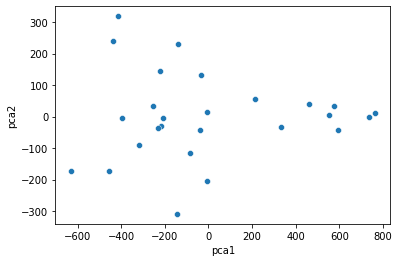

In [46]:
sns.scatterplot(x="pca1", y="pca2", data=df_pca)

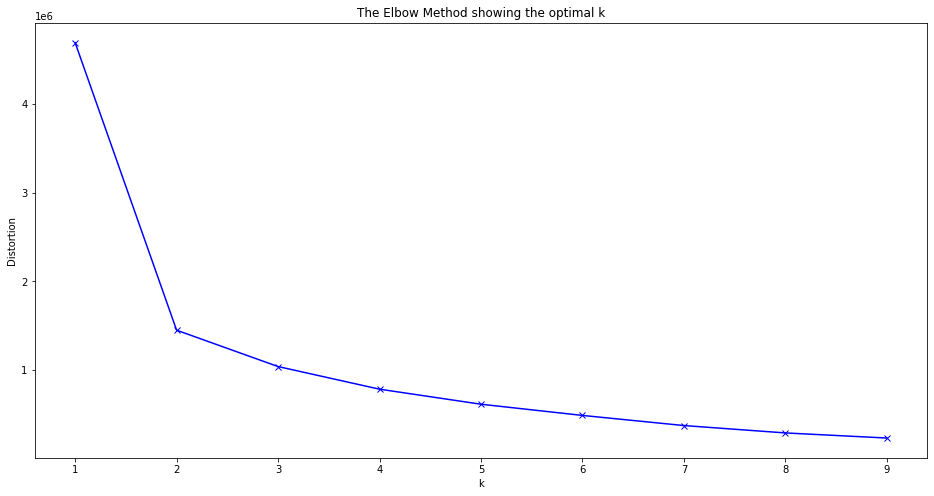

In [47]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

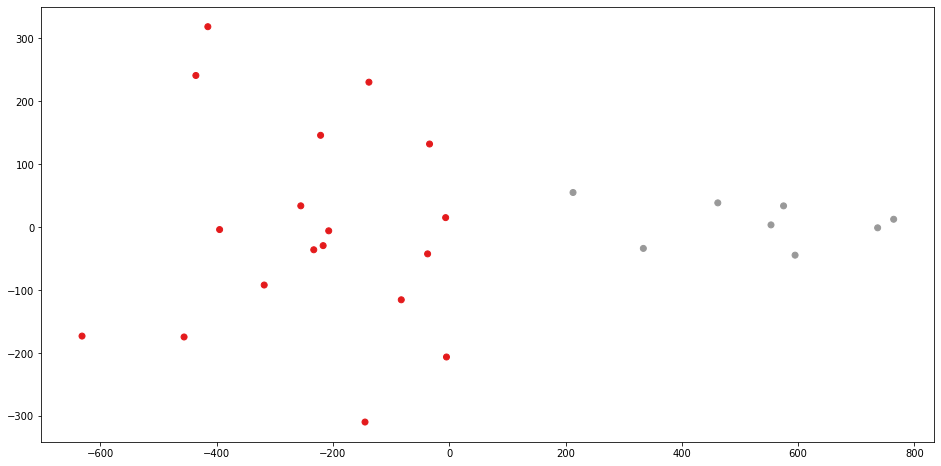

In [48]:
kmeanModel = KMeans(n_clusters=2)
kmeanModel.fit(df)
df_pca['k_means']=kmeanModel.predict(df)

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df_pca["pca1"], df_pca["pca2"], c=df_pca['k_means'], cmap=plt.cm.Set1)


In [52]:
df2 = pd.concat([df1, df_pca['k_means']], axis=1)
df2

,Rk_x,Player,Nation_x,Pos_x,Squad_x,Age_x,Born_x,MP,Starts,Min,...,Goal Kicks Att,Goal Kicks Launch%,Goal Kicks AvgLen,Crosses Opp,Crosses Stp,Crosses Stp%,Sweeper #OPA,Sweeper #OPA/90,Sweeper AvgDist,k_means
0,4.0,Daniel Bachmann,at AUT,GK,Watford,27.0,1994.0,12.0,12.0,1080.0,...,87.0,71.3,52.7,108.0,3.0,2.8,8.0,0.67,13.1,1
1,5.0,Asmir Begović,ba BIH,GK,Everton,34.0,1987.0,3.0,3.0,270.0,...,31.0,83.9,58.1,23.0,3.0,13.0,0.0,0.00,12.9,1
2,6.0,Jack Butland,eng ENG,GK,Crystal Palace,28.0,1993.0,9.0,8.0,765.0,...,66.0,53.0,43.7,83.0,5.0,6.0,6.0,0.71,13.6,1
3,8.0,Karl Darlow,eng ENG,GK,Newcastle Utd,30.0,1990.0,8.0,8.0,720.0,...,64.0,78.1,59.8,69.0,8.0,11.6,4.0,0.50,14.9,1
4,9.0,Martin Dúbravka,sk SVK,GK,Newcastle Utd,32.0,1989.0,26.0,26.0,2340.0,...,237.0,92.8,64.8,211.0,17.0,8.1,9.0,0.35,12.7,0
5,10.0,Ederson,br BRA,GK,Manchester City,27.0,1993.0,37.0,37.0,3330.0,...,138.0,24.6,31.6,181.0,16.0,8.8,34.0,0.92,17.2,0
6,11.0,Łukasz Fabiański,pl POL,GK,West Ham,36.0,1985.0,37.0,37.0,3330.0,...,280.0,70.4,52.9,344.0,14.0,4.1,9.0,0.24,11.8,0
7,12.0,Álvaro Fernández,es ESP,GK,Brentford,23.0,1998.0,12.0,12.0,1080.0,...,83.0,56.6,41.0,123.0,7.0,5.7,10.0,0.83,14.3,1
8,13.0,Fraser Forster,eng ENG,GK,Southampton,33.0,1988.0,19.0,19.0,1710.0,...,141.0,76.6,54.3,176.0,18.0,10.2,14.0,0.74,13.8,1
9,14.0,Ben Foster,eng ENG,GK,Watford,38.0,1983.0,26.0,26.0,2340.0,...,225.0,92.0,65.2,265.0,16.0,6.0,24.0,0.92,15.1,0


In [54]:
df2 = df2[["Player", "k_means"]]
df2

,Player,k_means
0,Daniel Bachmann,1
1,Asmir Begović,1
2,Jack Butland,1
3,Karl Darlow,1
4,Martin Dúbravka,0
5,Ederson,0
6,Łukasz Fabiański,0
7,Álvaro Fernández,1
8,Fraser Forster,1
9,Ben Foster,0


In [ ]:
# -------- GA 변수 포함 ------------